
<a href="https://colab.research.google.com/github/OsipovOleg/crash-python-notebooks/blob/master/scientific_computing.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Байесовская регрессия

Пусть дана обучающая выборка $\mathcal{D}$, состоящая из $N$ элементов, которая получена следующим образом: 

$$
y_i = w_0 + x_i w_1 + N(0, \sigma^2).
$$

Пусть априорное распределение для каждого из весов является нормальным. 

1. Получите вид апостериорного распределения $p(w| \mathcal{D})$.
2. Рассмотрите как меняется апостериорное распреление весов в зависимости *от числа объектов*, которые мы используем для обучения модели. 
- Получите параметры этого распределения. 
- Постройте плотности распределения весов. 
- Просемлируйте несколько значений весов из полученного апостериорного распределения и постройте предсказания (линии регересии на некотором интервале).
3. Как ведут себя полученные линии при добавлении новых данных. Какие выводы можно сделать. 

1. 

w_0 = -1/2 * -2 sum(y_i) (i = 0...N) /b^2 + -1/2 * 2m/d^2

w_1 = -1/2 * -2 sum(y_i) (i = 0...N) sum(x_i) (i = 0...N) /b^2 + -1/2 * 2m/d^2

w_0*w_1 = -1/2 * 2 sum(x_i) (i = 0...N)/b^2

/// подсчеты ////

мы доказали соответствие с нормальным распределением, из чего делаем вывод, что

p(w|D) = 1/(pi * q_1 * q_2 * sqrt(1 - p^2)) exp(-1/2(1 - p^2) * [(x_1 - m_1)^2/q_1^2 - p* (2 (x_1-m_1)(x_2-m_2)/(q_1 * q_2)) + (x_2-m_2)^2/q_2^2])

КОД ЧАСТЬ ПОДСЧЕТОВ РАСПРЕДЕЛЕНИЯ

In [598]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [599]:
N = 10

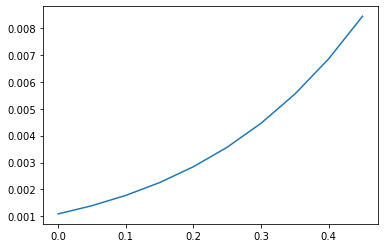

In [600]:
# определить х
w = np.linspace(0, 0.5, N, endpoint=False)
X = multivariate_normal.pdf(w, mean=2.5, cov=0.5)
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(w, X)

In [601]:
# w_0?

In [602]:
# w_1?

In [603]:
# из распределения
b = 5
# b**2

In [604]:
# дисперсия весов
d = w.std()
# d**2 

In [605]:
# сумма x_i
sumN = 0

for i in range (len(x)):
    sumN = sumN + x[i]
    
sumN

22.5

In [606]:
# убрала -
p = 1/2 * 2*sumN/b**2
p

0.9

In [607]:

b_1 = 1/(-((-1/(2 * b**2)*N - 1/d**2) * 2* (1 - p**2)))** (0.5)
b_1

0.2324937541920281

In [608]:

b_2 = 1/((-(-1/(2 * b**2)*sumN - 1/d**2) * 2*(1 - p**2)))** (0.5)
b_2

0.23189910777611838

In [609]:
a = -1 / (2 * (1-p**2)) * 1 / b_1**2
a

-48.68484848484849

In [610]:
b_B = -1 / (2 * (1-p**2)) * 1 / b_2**2
b_B

-48.93484848484848

In [611]:
c = 1 / (2 * (1-p**2)) * p**2 / (b_1 * b_2)
c

39.53584762398686

In [612]:
sumY = 0

for i in range (len(x)):
    # из чего??? w_0? w_1?
    sumY = sumY + w[0] + w[i]*x[i]
    
sumY

7.125

In [613]:
# мат ожидание весов
m = w.mean()
m

0.22500000000000003

In [614]:
m_2 = (-sumY * sumN / b**2 - m / d**2 - c*sumY/(-2*a*b**2)) / (-2* b_B + c**2/(2 *a))
m_2

-0.21312676939428074

In [615]:
m_1 = sumY/b**2 - 2*m/d**2 + c * m_2
m_1

-29.959329297546695

In [616]:
import math

In [617]:
p_w_D = 1/(math.pi * b_1 * b_2 * (1 - p**2)**(0.5)) * math.exp(-1/(2*(1 - p**2)) * (w[0] - m_1)**2/b_1**2 - p* (2 *(w[0]-m_1)*(w[1]-m_2)/(b_1 * b_2)) + (w[1]-m_2)**2/b_2**2)
p_w_D

0.0

2.

Посчитать параметры

In [618]:
# мат ожидание
p_w_D.mean()

0.0

In [619]:
# дисперсия
p_w_D.var()

0.0

Распредление весов (плотность)

In [620]:
# pl = p_w_D.diff()

Просемлируйте несколько значений весов из полученного апостериорного распределения и постройте предсказания (линии регересии на некотором интервале).

3. Как ведут себя полученные линии при добавлении новых данных. Какие выводы можно сделать. 